### 📚 초급 딥러닝 미션: "퍼셉트론과 다층 퍼셉트론 직접 구현하기"


# 🎯 목표
- 퍼셉트론(perceptron) 모델을 직접 코딩하여 논리 연산(AND, OR, XOR)을 구현한다.
- 다층 퍼셉트론(MLP)을 직접 구현하고, XOR 문제를 해결한다.
- 활성화 함수(sigmoid, ReLU 등)를 직접 만든다.
- 가중치(weight)와 편향(bias)의 행렬 연산을 수작업으로 구현해본다.



## 📂 미션 구성



### Part 1. 퍼셉트론(Perceptron)으로 논리 게이트 구현

퍼셉트론 1개를 이용해 AND, OR 연산을 직접 구현합니다.  
퍼셉트론의 수식:  
$ y = \text{step}(w_1x_1 + w_2x_2 + b) $

**제시할 문제:**
- AND 게이트를 퍼셉트론으로 구현해보고, (0,0), (0,1), (1,0), (1,1) 입력에 대해 출력 결과를 확인하세요.
- OR 게이트도 같은 방식으로 구현하세요.


In [7]:
import numpy as np

def Perceptron(x,w,b):
    y = np.sum(x*w) + b
    if y <=0:
        return 0
    else:
        return 1
# AND 
def AND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5, 0.5])
    b = -0.7

    return Perceptron(x,w,b)

# OR
def OR (x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.2

    return Perceptron(x,w,b)

print("AND(0,0):", AND(0,0))
print("AND(0,1):", AND(0,1))
print("AND(1,0):", AND(1,0))
print("AND(1,1):", AND(1,1))
print("OR(0,0):",  OR(0,0))
print("OR(0,1):",  OR(0,1))
print("OR(1,0):",  OR(1,0))
print("OR(1,1):",  OR(1,1))

#결과 엔드는 두개다 1일때 1 
#OR은 하나라도 1이면 1 

AND(0,0): 0
AND(0,1): 0
AND(1,0): 0
AND(1,1): 1
OR(0,0): 0
OR(0,1): 1
OR(1,0): 1
OR(1,1): 1



### Part 2. 다층 퍼셉트론(MLP)으로 XOR 문제 해결

XOR 문제는 단일 퍼셉트론으로 해결할 수 없습니다.  
2개의 은닉 뉴런(hidden neuron)을 가진 간단한 다층 퍼셉트론을 구현하세요.

구성:
- 입력층(2개) → 은닉층(2개 뉴런, 활성화 함수 사용) → 출력층(1개 뉴런, 활성화 함수 사용)

**힌트:**
- 은닉층에서는 ReLU, 출력층에서는 Sigmoid를 사용할 수 있습니다.


In [13]:
import numpy as np

#RelU함수
def relu(x):
    return np.maximum(0, x)

#시그모이드
def sigmoid(x):
    return 1/ (1+np.exp(-x))

#다층퍼셉트론 
def MLP(x):
    #은닉층 가중치와 편향 
    w1 = np.array([[1.0,1.0], [-1.0,-1.0]]) #첫번째 입력 뉴런에 연결된 가중치, 두번째 입력 뉴런에 연결된 가중치 
    b1 = np.array([[0.0, 1.5]])

    #출력층 가중치와 편향
    w2 = np.array([[1.0], [1.0]])
    b2 = np.array([-1.0])

    #은닉층 활성화 
    hidden = relu(np.dot(x, w1) + b1)
    output = sigmoid(np.dot(hidden, w2) + b2)
    
    return output 

# XOR 입력값
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# 결과 출력
for x in X:
    y = MLP(x)
    print(f"입력: {x}, 출력: {y.round()}")


입력: [0 0], 출력: [[1.]]
입력: [0 1], 출력: [[0.]]
입력: [1 0], 출력: [[1.]]
입력: [1 1], 출력: [[1.]]



### Part 3. 활성화 함수 직접 구현하기

- Sigmoid 함수와 ReLU 함수를 직접 정의하세요.

수식:
- Sigmoid:  
$ \sigma(x) = \frac{1}{1 + e^{-x}} $
- ReLU:  
$ \text{ReLU}(x) = \max(0, x) $

**추가 문제:**
- Sigmoid와 ReLU를 각각 그래프로 시각화해서 차이를 설명해보세요.


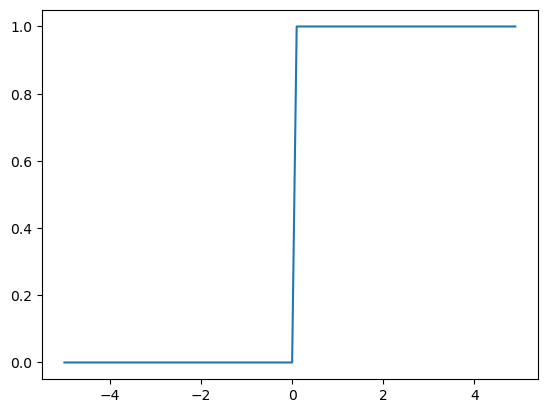

In [21]:
#step Function:  퍼셉트론에서 사용하는 활성화 함수
def step_function(x):
    y = x > 0
    y = y.astype(int)
    return y 
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

import matplotlib.pylab as plt
plt.plot(x, y)
plt.show()

[0.119 0.182 0.378 0.5   0.622 0.818 0.881]


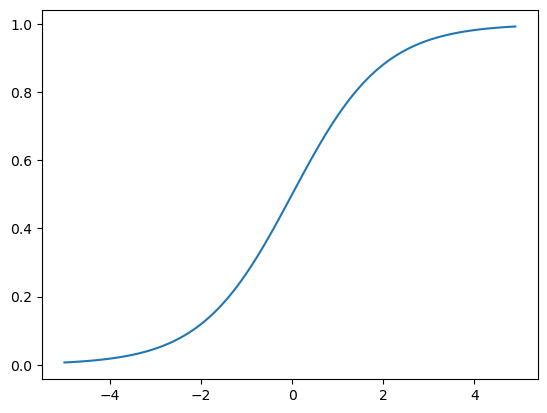

In [14]:
#시그모이드 함수  그래프 
def sigmoid(x):
    return 1/(1+ np.exp(-x))

x = np.array([-2,-1.5, -0.5, 0, 0.5, 1.5, 2])
y = sigmoid(x)

print(np.round(y,3))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()


[0.  0.  0.  0.  0.7 1.5 4. ]


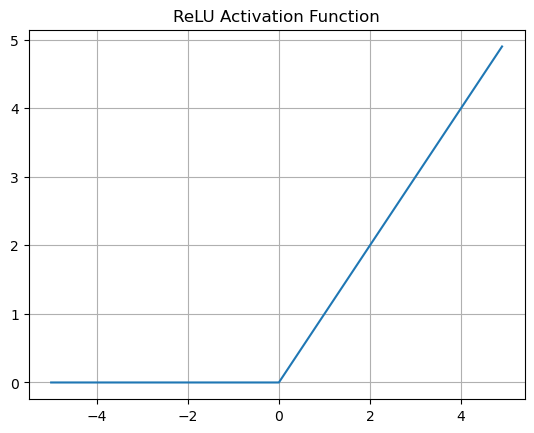

In [25]:
#ReLu 그래프 
import numpy as np
import matplotlib.pyplot as plt 

#입력이 0 넘으면 그대로 출력, 그렇지 않으면 0 출력 
def relu(x):
    return np.maximum(0, x)

x_test = np.array([-4, -3.5, -0.5, 0, 0.7, 1.5, 4])
y_test = relu(x_test)

print(np.round(y_test, 3))

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

#그래프 그리기 
plt.plot(x,y)
plt.title('ReLU Activation Function')
plt.grid(True)
plt.show()



### Part 4. 행렬 곱 연산으로 퍼셉트론 계산하기

- 2차원 입력 벡터와 가중치 행렬을 곱해서 퍼셉트론 출력을 계산하세요.
- 넘파이(Numpy)만 사용 가능합니다 (PyTorch, TensorFlow 사용 금지).

**포맷:**
- 입력 $X = [x_1, x_2]$
- 가중치 행렬 $W = \begin{bmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \end{bmatrix}$
- 편향 벡터 $b = [b_1, b_2]$

출력:  
$ y = \text{activation}(XW + b) $


In [24]:
import numpy as np

#활성화 함수 relu 
def relu(x):
    return np.maximum(0, x)

#입력, 가중치, 편향
X = np.array([5,3])
W = np.array([
    [1,2],
    [3,4]
]) 
b = np.array([-1,1])

#퍼셉트론 계산 
y = relu(np.dot(X, W) + b)

print(y)

[13 23]



## ✨ 추가 보너스 과제 (선택)
- 은닉층 뉴런 수를 2개 이상으로 바꿔보고, XOR 문제 성능 변화를 관찰하세요.
- 시그모이드 대신 하이퍼볼릭 탄젠트 함수(tanh)를 사용해서 비교해보세요.



## 📋 체크리스트
| 체크 항목 | 완료 여부 |
|:---|:---:|
| 퍼셉트론으로 AND/OR 구현 | ✅ |
| 다층 퍼셉트론으로 XOR 구현 | ✅ |
| 활성화 함수(Sigmoid, ReLU) 직접 구현 | ✅ |
| 가중치 행렬 연산으로 계산 | ✅ |
| 결과 설명과 출력 포함 | ✅ |
| (보너스) 은닉층 수 변화 실험 | ⬜ |
